<a href="https://colab.research.google.com/github/beatricexc/Face-Recognition-App-/blob/main/Face_Recognition_with_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn import datasets

data = datasets.fetch_olivetti_faces()

Renaming the dataset's contents for more convenient access

In [9]:
# renaming data set for easy access
X = data["data"]
imgs = data["images"]
y = data["target"]

Previwing the Data by plotting the first face image of every person (40 faces in total) using matplotlib

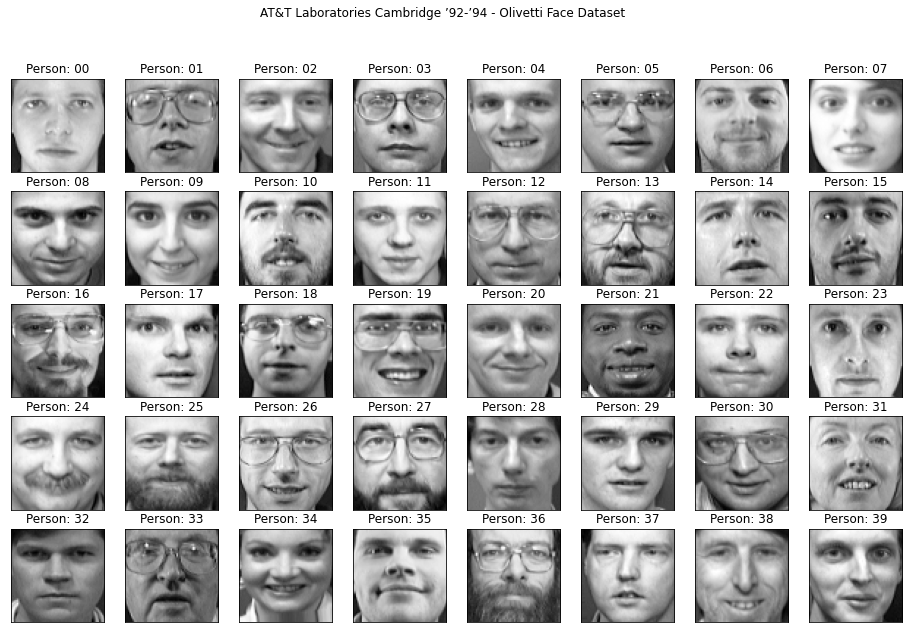

In [10]:
%matplotlib inline
from math import ceil
from matplotlib import pyplot as plt

# select unique people ids
people_ids = set(y)

# setting layout for subplots.
n_cols = 8
n_rows = ceil(len(people_ids) / n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))

# iterate over the ids of people and plot first image for each of them
for person_id in people_ids:
    # finding indexes of the person_id
    person_ixs = y == person_id
    # selecting the images of the person and picking the first one for preview
    image = data["images"][person_ixs][0]
    # plotting the image as grayscale
    axes[person_id // n_cols][person_id % n_cols].imshow(image, cmap="gray")
    # setting subplot title
    title = "Person: {:02d}".format(person_id)
    axes[person_id // n_cols][person_id % n_cols].set_title(title)

# removing ticks on x & y axis
plt.setp(axes, xticks=[], yticks=[])

# setting general plot title
plt.suptitle("AT&T Laboratories Cambridge ’92-’94 - Olivetti Face Dataset")

plt.show()

Approach: 
- classification problem where subject (person) ids are classes and face images are the samples
- trying to identify person id from a face image will be a classical classification problem

Note: this dataset has already been preprocessed. All faces have the same angle, the colors have been mapped to 256 shades of grey with no hair and background

Next, we need to split the data into train and test in order to measure the performance of our SVM model. For this we use the 'StratifiedShuffleSplit' class of sklearn which allows us to create **randomized** train and test sets for a cross validation with equal trin/test ration for all classes. 

In [12]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

# split data randomly into train & test sets by preserving train/test ratio across classes
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# get the train and test indexes
train_index, test_index = next(sss.split(X, y))

# split X and y into train & test sets
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

# Print statistics about it
print(f"Train data size: {len(y_train)}")
print(f"Test data size : {len(y_test)}")

Train data size: 320
Test data size : 80


# Classification 
Frist we define the classfier SVC

In [13]:
from sklearn.svm import SVC
import timeit

# define the SVM classifier with a Radial Basis Function (RBF) kernel.
classifier = SVC(kernel="rbf", gamma="scale", random_state=0)

Next, we train the classifier using the training data and the classifier model with the 'fit'function

In [15]:
# train the classifier and keep track of the time for training.
time = timeit.timeit(lambda: classifier.fit(X_train, y_train), number=1)
print(f"Training completed in {time:.2f} secs.")

Training completed in 0.29 secs.


In [16]:
y_pred = classifier.predict(X_test) # predicting the classifier

Now we're using the accuracy_score metric of scikit-learn library. Accuracy score is the % of correctly predicted samples among all test samples

In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {100 * accuracy:.2f}%")

num_correct = np.sum(y_test == y_pred)
print(f"Number of correctly classified samples: {num_correct}")

num_incorrect = len(y_test) - num_correct
print(f"Number of incorrectly classified samples: {num_incorrect}")

Accuracy score: 95.00%
Number of correctly classified samples: 76
Number of incorrectly classified samples: 4
